(78412, 3) (19603, 3)
0.8316711727796766
['Accidental' 'Homicide' 'Suicide' 'Undetermined']
[0.10891825 0.85419219 0.03688956]


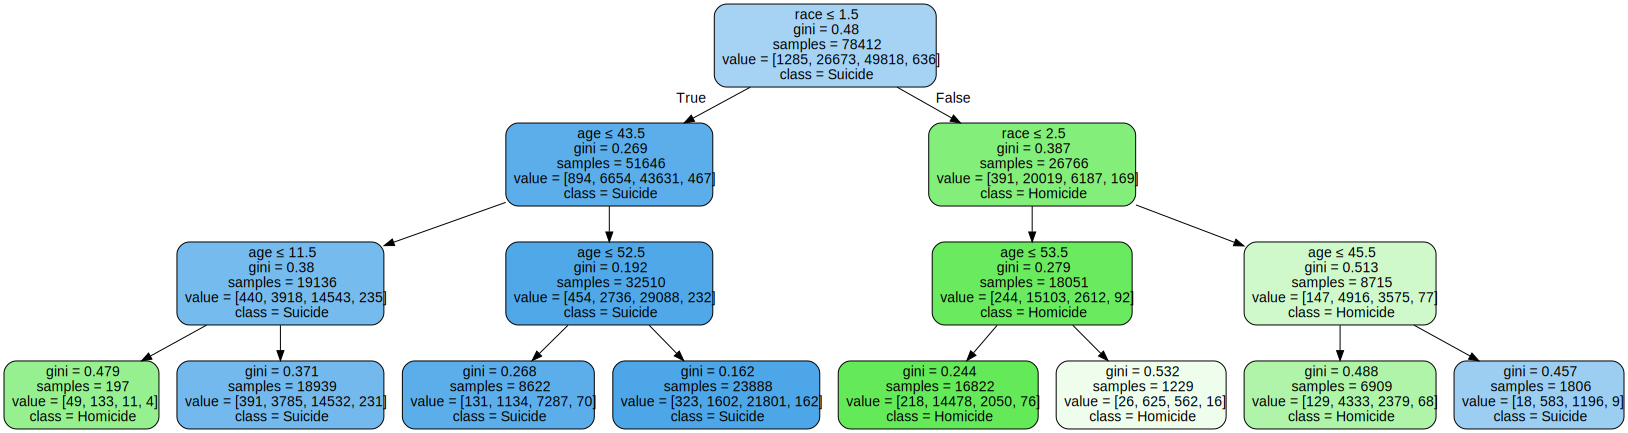

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

gun_death = pd.read_csv('gun_deaths.csv')
gd_cleaned=gun_death.dropna()
target = gd_cleaned['intent']
data = gd_cleaned[['age', 'race', 'education']]

train_input, test_input, train_target, test_target = train_test_split(data,target, test_size=0.2,random_state=42)
print(train_input.shape, test_input.shape)

race_mapping = {'White': 1, 'Black': 2, 'Asian/Pacific Islander': 3, 'Native American/Native Alaskan': 4, 'Hispanic': 5}
train_input['race'] = train_input['race'].map(race_mapping)
test_input['race'] = test_input['race'].map(race_mapping)

education_mapping = {'Less than HS': 1, 'HS/GED': 2, 'Some college': 3, 'BA+': 4}
train_input['education'] = train_input['education'].map(education_mapping)
test_input['education'] = test_input['education'].map(education_mapping)

dt = DecisionTreeClassifier(random_state=1)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.classes_)
print(dt.feature_importances_)

from sklearn import tree
import graphviz
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dot_data = tree.export_graphviz(dt.fit(train_input, train_target), out_file = None,
                                feature_names=data.columns,
                                class_names=dt.classes_,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
import joblib
joblib.dump(dt, 'DTree_model.pkl')

['DTree_model.pkl']

In [19]:
from sklearn.metrics import precision_score, recall_score

train_pred = dt.predict(train_input)
test_pred = dt.predict(test_input)

train_precision = precision_score(train_target, train_pred, average='weighted', zero_division=0)
train_recall = recall_score(train_target, train_pred, average='weighted')

test_precision = precision_score(test_target, test_pred, average='weighted', zero_division=0)
test_recall = recall_score(test_target, test_pred, average='weighted')

print("Train Precision:", train_precision)
print("Train Recall:", train_recall)

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Train Precision: 0.7992641325879716
Train Recall: 0.8211115645564454
Test Precision: 0.8036860572195151
Test Recall: 0.8253328572157322


In [17]:
new_Data=[40,2,1]#age, race, edu
pred=dt.predict([new_Data])
if(pred[0]=='Suicide'):
  print("Suicide case")
elif(pred[0]=='Homicide'):
  print("Homicide case")
elif(pred[0]=='Accidental'):
  print("Accidental case")
else:
  print("Undetermined case")

Homicide case


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


NameError: ignored